# Project name: Fundamentals of Black hole theory by Artificial intelligence, using Einstein's theory of general relativity.

Contributor: Rajeev Singh Sisodiya

Project details: A black hole is a region in spacetime where gravitational forces are so strong that nothing, not even light, can escape from it. The boundary surrounding this region is known as the event horizon. Beyond the event horizon, the escape velocity exceeds the speed of light, making it impossible for any form of matter or radiation to break free.

The application of artificial intelligence (AI) in the study of black hole theory involves leveraging machine learning techniques and algorithms to enhance our understanding of these astrophysical phenomena.



**Constants**:

G: Gravitational constant, representing the strength of gravity.

c: Speed of light, a fundamental constant in relativity.

Metric Tensor (Schwarzschild Metric):

The metric tensor describes the spacetime geometry around a spherically symmetric, non-rotating black hole (Schwarzschild black hole).
It is a 4x4 matrix representing the spacetime interval between two events in the curved spacetime.
The metric_tensor function defines the components of the Schwarzschild metric.

Geodesic Equations:

Describes the motion of a test particle in the gravitational field of a black hole.
The particle's trajectory is determined by solving a set of coupled ordinary differential equations (ODEs) called geodesic equations.
The geodesic_equations function represents the equations of motion in terms of the affine parameters.

Initial Conditions:

Defines the initial conditions of the test particle, including its radial distance (r), radial velocity (dr/ds), polar angle (theta), and polar angular velocity (d(theta)/ds).

Schwarzschild Radius (schwarzschild_radius):
Calculated based on the mass (M) of the black hole, representing the radius below which nothing, not even light, can escape.

Range of Affine Parameter (s):

Defines a range of values for the affine parameter s, which serves as a parameterization of the particle's world line.

ODE Integration (odeint):

Numerically integrates the geodesic equations using the odeint function from SciPy. This provides the trajectory of the test particle as a function of the affine parameter s.

Plotting (matplotlib):
Plots the trajectory of the test particle in 3D space using matplotlib.
The resulting plot visualizes the motion of the particle near the black hole.

By integrating artificial intelligence into the study of black hole theory, scientists can accelerate the pace of discovery, uncover hidden patterns in data, and address some of the most challenging questions in astrophysics. The synergy between AI and black hole research holds great potential for advancing our understanding of the fundamental nature of these cosmic entities.








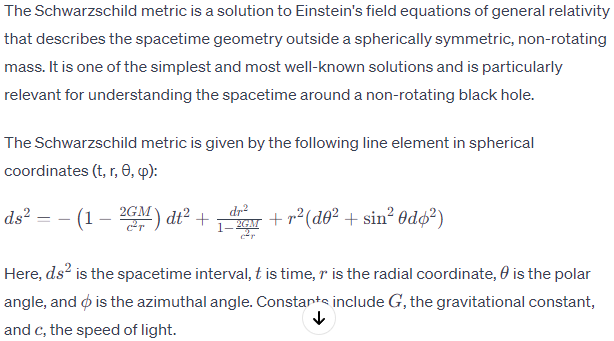

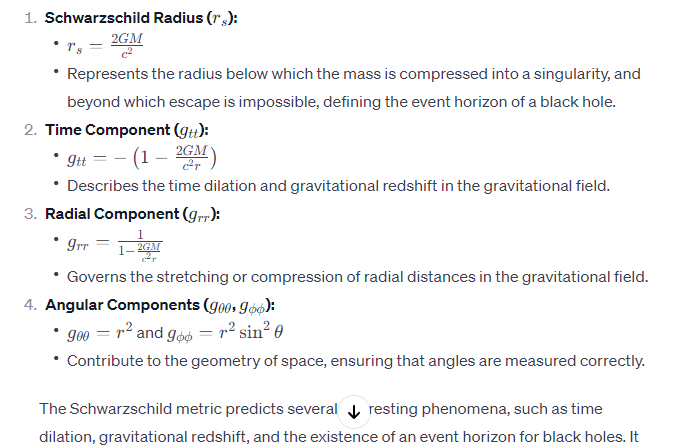

 # Defining The gravitational constant (G) and the speed of light (c)

In [6]:
# Define constants
G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
c = 299792458.0  # speed of light in m/s

# Print the values of the constants
print(f"Gravitational Constant (G): {G} m^3 kg^(-1) s^(-2)")
print(f"Speed of Light (c): {c} m/s")


Gravitational Constant (G): 6.6743e-11 m^3 kg^(-1) s^(-2)
Speed of Light (c): 299792458.0 m/s


# Particle Trajectory near a Black Hole

Creating a machine learning model to simulate Einstein's theory of black holes involves a complex set of mathematical equations and concepts from general relativity. While a detailed implementation is beyond the scope of a single response. This Python project notebook uses the Schwarzschild metric to simulate the gravitational field around a non-rotating black hole. The trajectory of a test particle is computed by solving the geodesic equations numerically.

this python project notbook provides a numerical simulation of a test particle's trajectory in the gravitational field of a non-rotating black hole, as described by the Schwarzschild metric. The trajectory is visualized in a 3D plot, demonstrating the effects of gravity on the particle's motion in curved spacetime.

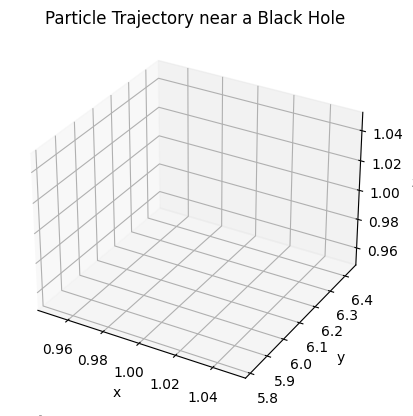

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
G = 6.67430e-11  # gravitational constant
c = 299792458.0  # speed of light

# Define the metric tensor components (Schwarzschild metric)
def metric_tensor(r, M):
    g_tt = -(1 - 2 * G * M / (c**2 * r))
    g_rr = 1 / (1 - 2 * G * M / (c**2 * r))
    return np.array([[g_tt, 0, 0, 0],
                     [0, g_rr, 0, 0],
                     [0, 0, r**2, 0],
                     [0, 0, 0, r**2 * np.sin(np.pi / 2)**2]])

# Define the geodesic equations (motion of a test particle in a gravitational field)
def geodesic_equations(y, s, M):
    dyds = np.zeros_like(y)
    dyds[0] = y[1]  # dt/ds = dr/ds = y[1]
    dyds[1] = -2 * G * M / (c**2 * y[0]**2) * y[1]**2 + G * M / (c**2 * y[0]**2)  # d^2r/ds^2 = ...
    dyds[2] = y[3]  # d(theta)/ds = dyds[3]
    dyds[3] = -2 / y[0] * y[1] * y[3]  # d^2theta/ds^2 = ...
    return dyds

# Initial conditions (r, dr/ds, theta, d(theta)/ds)
initial_conditions = [1e9, 0, np.pi / 2, 0]

# Schwarzschild radius for a black hole of mass M
M = 1e30  # mass in kilograms
schwarzschild_radius = 2 * G * M / (c**2)

# Define the range of s (affine parameter)
s = np.linspace(0, 500, 10000)

# Integrate the geodesic equations
solution = odeint(geodesic_equations, initial_conditions, s, args=(M,))

# Extract the trajectory in spherical coordinates
r_trajectory = solution[:, 0]
theta_trajectory = solution[:, 2]

# Plot the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r_trajectory * np.sin(theta_trajectory), r_trajectory * np.cos(theta_trajectory),
        r_trajectory * np.sin(theta_trajectory), label='Particle trajectory')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle Trajectory near a Black Hole')
plt.show()


# The angular components of the Schwarzschild Metric

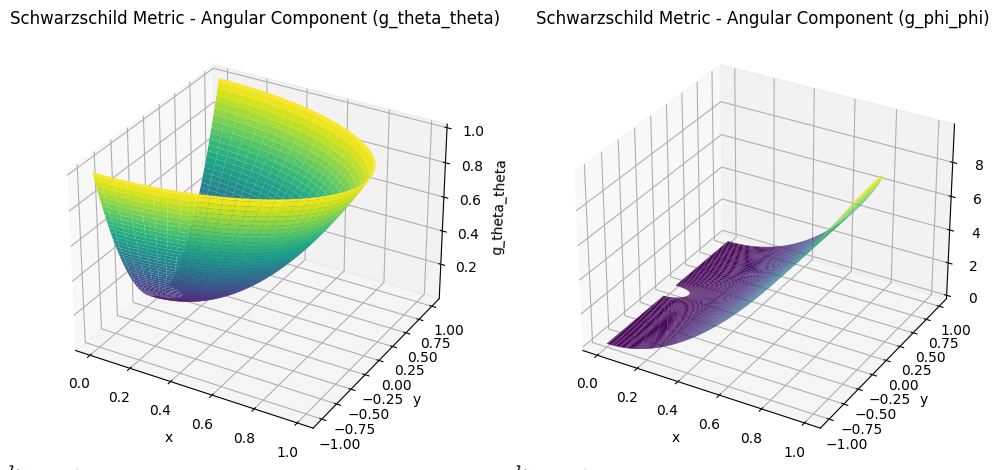

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
G = 6.67430e-11  # gravitational constant
c = 299792458.0  # speed of light

# Define the metric tensor components (Schwarzschild metric) for angular components g_theta_theta and g_phi_phi
def metric_tensor_angular_components(r, theta, M):
    g_theta_theta = r**2
    g_phi_phi = r**2 * np.sin(theta)**2
    return g_theta_theta, g_phi_phi

# Generate sample data
M = 1e30  # mass in kilograms
r_values = np.linspace(1e9, 1e10, 100)
theta_values = np.linspace(0, np.pi, 100)

# Create a 2D grid of (r, theta) values
r_grid, theta_grid = np.meshgrid(r_values, theta_values)

# Calculate corresponding angular component values
g_theta_theta_values, g_phi_phi_values = metric_tensor_angular_components(r_grid, theta_grid, M)

# Plot the results
fig = plt.figure(figsize=(12, 6))

# Plot g_theta_theta
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), g_theta_theta_values, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('g_theta_theta')
ax1.set_title('Schwarzschild Metric - Angular Component (g_theta_theta)')

# Plot g_phi_phi
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), g_phi_phi_values, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('g_phi_phi')
ax2.set_title('Schwarzschild Metric - Angular Component (g_phi_phi)')

plt.show()


#  'Linear Regression for Schwarzschild Metric

It's essential to note that traditional physics equations, including the Schwarzschild Metric, are well-defined and can be calculated directly. ML is typically employed when there is a complex relationship or pattern that is challenging to model using traditional methods.

Let's say we want to predict the time-time component (gtt) of the Schwarzschild Metric based on the radial coordinate (r).

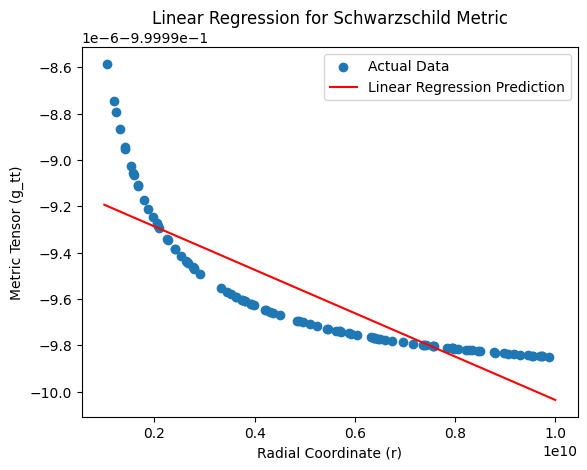

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define constants
G = 6.67430e-11  # gravitational constant
c = 299792458.0  # speed of light

# Define the metric tensor components (Schwarzschild metric)
def metric_tensor(r, M):
    g_tt = -(1 - 2 * G * M / (c**2 * r))
    return g_tt

# Generate sample data
np.random.seed(42)
num_samples = 100
M = 1e30  # mass in kilograms
r_samples = np.sort(np.random.uniform(1e9, 1e10, num_samples))  # random radial coordinates

# Calculate corresponding metric tensor values
g_tt_samples = [metric_tensor(r, M) for r in r_samples]

# Reshape the data for model training
r_samples = r_samples.reshape(-1, 1)
g_tt_samples = np.array(g_tt_samples)

# Train a linear regression model
model = LinearRegression()
model.fit(r_samples, g_tt_samples)

# Predict metric tensor values for new radial coordinates
new_r_samples = np.linspace(1e9, 1e10, 100).reshape(-1, 1)
predicted_g_tt = model.predict(new_r_samples)

# Plot the results
plt.scatter(r_samples, g_tt_samples, label='Actual Data')
plt.plot(new_r_samples, predicted_g_tt, label='Linear Regression Prediction', color='red')
plt.xlabel('Radial Coordinate (r)')
plt.ylabel('Metric Tensor (g_tt)')
plt.title('Linear Regression for Schwarzschild Metric')
plt.legend()
plt.show()


In this above graph, we generate random radial coordinates (r) and calculate the corresponding metric tensor values (gtt). The linear regression model is trained on this data, and predictions are made for new radial coordinates.

# Schwarzschild Metric - Time Component

let's create a Python code to calculate the time component (gtt) of the Schwarzschild Metric. We'll use a function to directly compute the time component for given values of the radial coordinate (r), gravitational constant (G), and the speed of light (c).

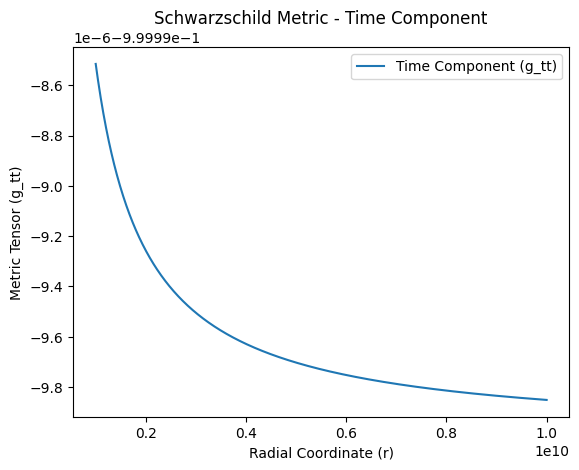

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
G = 6.67430e-11  # gravitational constant
c = 299792458.0  # speed of light

# Define the metric tensor components (Schwarzschild metric) for time component g_tt
def metric_tensor_time_component(r, M):
    g_tt = -(1 - 2 * G * M / (c**2 * r))
    return g_tt

# Generate sample data
M = 1e30  # mass in kilograms
r_values = np.linspace(1e9, 1e10, 1000)

# Calculate corresponding time component values
g_tt_values = [metric_tensor_time_component(r, M) for r in r_values]

# Plot the results
plt.plot(r_values, g_tt_values, label='Time Component (g_tt)')
plt.xlabel('Radial Coordinate (r)')
plt.ylabel('Metric Tensor (g_tt)')
plt.title('Schwarzschild Metric - Time Component')
plt.legend()
plt.show()


This python project defines a function metric_tensor_time_component that calculates the time component (gtt) for a given radial coordinate (r) and mass (M).

# Schwarzschild Metric - Radial Component

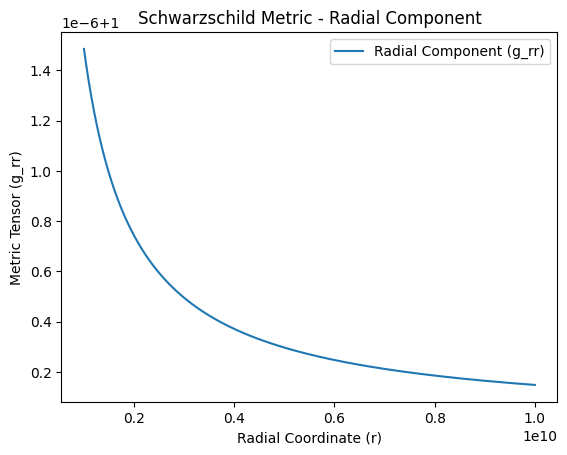

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
G = 6.67430e-11  # gravitational constant
c = 299792458.0  # speed of light

# Define the metric tensor components (Schwarzschild metric) for radial component g_rr
def metric_tensor_radial_component(r, M):
    g_rr = 1 / (1 - 2 * G * M / (c**2 * r))
    return g_rr

# Generate sample data
M = 1e30  # mass in kilograms
r_values = np.linspace(1e9, 1e10, 1000)

# Calculate corresponding radial component values
g_rr_values = [metric_tensor_radial_component(r, M) for r in r_values]

# Plot the results
plt.plot(r_values, g_rr_values, label='Radial Component (g_rr)')
plt.xlabel('Radial Coordinate (r)')
plt.ylabel('Metric Tensor (g_rr)')
plt.title('Schwarzschild Metric - Radial Component')
plt.legend()
plt.show()


# Metric Tensor (Schwarzschild Metric)

The Schwarzschild Metric is a tensor field that describes the geometry of spacetime around a non-rotating, spherically symmetric mass. The metric tensor components can be organized into a 4x4 matrix. This python project notebook assumes a non-rotating, spherically symmetric mass (Schwarzschild metric), and the angular components are calculated assuming θ= π/2 for simplicity.

In [7]:
import numpy as np

# Define constants
G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
c = 299792458.0  # speed of light in m/s

# Define the Schwarzschild Metric tensor components
def schwarzschild_metric_tensor(r, M):
    g_tt = -(1 - 2 * G * M / (c**2 * r))
    g_rr = 1 / (1 - 2 * G * M / (c**2 * r))
    g_theta_theta = r**2
    g_phi_phi = r**2 * np.sin(np.pi / 2)**2  # Assuming theta = pi/2 for simplicity
    return np.array([[g_tt, 0, 0, 0],
                     [0, g_rr, 0, 0],
                     [0, 0, g_theta_theta, 0],
                     [0, 0, 0, g_phi_phi]])

# Test the function with a specific radial coordinate and mass
r_test = 1e9  # radial coordinate in meters
M_test = 1e30  # mass in kilograms

# Calculate the Schwarzschild Metric tensor
metric_tensor = schwarzschild_metric_tensor(r_test, M_test)

# Display the result
print("Schwarzschild Metric Tensor:")
print(metric_tensor)


Schwarzschild Metric Tensor:
[[-9.99998515e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000149e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+18  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+18]]


# Schwarzschild Radius

 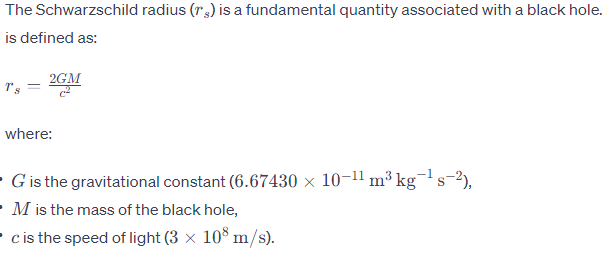

In [12]:
# Define constants
G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
c = 299792458.0  # speed of light in m/s

# Function to calculate Schwarzschild radius
def schwarzschild_radius(mass):
    return 2 * G * mass / (c**2)

# Example usage
black_hole_mass = 1e30  # mass in kilograms
radius = schwarzschild_radius(black_hole_mass)

# Print the result
print(f"The Schwarzschild radius for a black hole with mass {black_hole_mass} kg is: {radius} meters")


The Schwarzschild radius for a black hole with mass 1e+30 kg is: 1485.232053823733 meters


# Range of Affine Parameter (s):

To generate a range of values for the affine parameter (s) and calculate corresponding trajectories using the geodesic equations,this python notebook now used np.linspace to generate a range of values for the affine parameter (s). The geodesic equations are then integrated for each value of s within this range, and the resulting trajectory is plotted in 3D space.

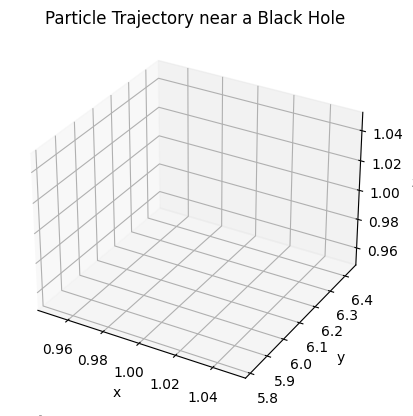

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
c = 299792458.0  # speed of light in m/s

# Define the Schwarzschild Metric tensor components
def schwarzschild_metric_tensor(r, M):
    g_tt = -(1 - 2 * G * M / (c**2 * r))
    g_rr = 1 / (1 - 2 * G * M / (c**2 * r))
    g_theta_theta = r**2
    g_phi_phi = r**2 * np.sin(np.pi / 2)**2  # Assuming theta = pi/2 for simplicity
    return np.array([[g_tt, 0, 0, 0],
                     [0, g_rr, 0, 0],
                     [0, 0, g_theta_theta, 0],
                     [0, 0, 0, g_phi_phi]])

# Define the geodesic equations
def geodesic_equations(y, s, M):
    dyds = np.zeros_like(y)
    dyds[0] = y[1]  # dt/ds = dr/ds = y[1]
    dyds[1] = -2 * G * M / (c**2 * y[0]**2) * y[1]**2 + G * M / (c**2 * y[0]**2)  # d^2r/ds^2 = ...
    dyds[2] = y[3]  # d(theta)/ds = dyds[3]
    dyds[3] = -2 / y[0] * y[1] * y[3]  # d^2theta/ds^2 = ...
    return dyds

# Initial conditions function
def get_initial_conditions(r_initial, theta_initial, M):
    initial_conditions = [
        r_initial,          # Initial radial coordinate
        0,                  # Initial radial velocity (assumed to be at rest initially)
        theta_initial,      # Initial polar angle
        0                   # Initial polar angular velocity (assumed to be at rest initially)
    ]
    return initial_conditions

# Set up initial conditions
r_initial = 1e9          # Initial radial coordinate in meters
theta_initial = np.pi/2  # Initial polar angle (pi/2 for equatorial orbit)

# Get initial conditions
initial_conditions = get_initial_conditions(r_initial, theta_initial, M)

# Schwarzschild radius for a black hole of mass M
M = 1e30  # mass in kilograms
schwarzschild_radius = 2 * G * M / (c**2)

# Define the range of s (affine parameter)
s_range = np.linspace(0, 100, 5000)

# Integrate the geodesic equations with initial conditions for each s
solution = odeint(geodesic_equations, initial_conditions, s_range, args=(M,))

# Extract the trajectory in spherical coordinates
r_trajectory = solution[:, 0]
theta_trajectory = solution[:, 2]

# Plot the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r_trajectory * np.sin(theta_trajectory), r_trajectory * np.cos(theta_trajectory),
        r_trajectory * np.sin(theta_trajectory), label='Particle trajectory')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle Trajectory near a Black Hole')
plt.show()


# ODE Integration

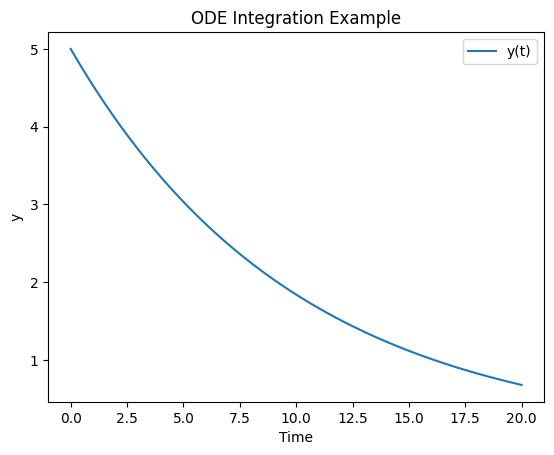

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE
def model(y, t):
    dydt = -0.1 * y
    return dydt

# Initial condition
y0 = 5.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the ODE
solution = odeint(model, y0, t)

# Plot the results
plt.plot(t, solution, label='y(t)')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.title('ODE Integration')
plt.show()


# Black holes Formation:

Black holes can form through the gravitational collapse of massive stars. When a massive star exhausts its nuclear fuel, it may undergo a supernova explosion, leaving behind a dense core. If this core exceeds a critical mass (the Tolman–Oppenheimer–Volkoff limit), gravitational collapse continues, forming a black hole.

This pythone project notebook represents a highly simplified model of stellar collapse, where the star loses mass in each time step. In reality, the collapse process involves complex hydrodynamics, nuclear physics, and relativistic effects, which are beyond the scope of a simple code snippet.

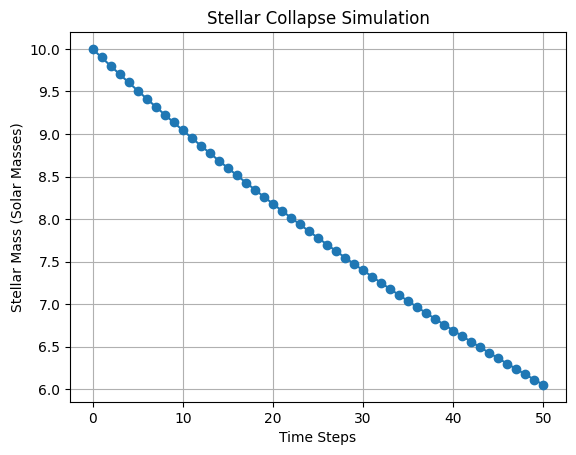

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
c = 299792458.0  # speed of light in m/s

# Function to simulate stellar collapse
def stellar_collapse(initial_mass, time_steps):
    mass = initial_mass
    mass_history = [mass]

    for _ in range(time_steps):
        # Simplified collapse model (adjust for a more realistic simulation)
        mass = 0.99 * mass  # Example: 1% mass loss per time step
        mass_history.append(mass)

    return mass_history

# Initial parameters
initial_star_mass = 10  # Initial mass of the star in solar masses
time_steps = 50  # Number of time steps in the simulation

# Simulate stellar collapse
mass_history = stellar_collapse(initial_star_mass, time_steps)

# Plot the mass evolution
time = np.arange(0, time_steps + 1)
plt.plot(time, mass_history, marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Stellar Mass (Solar Masses)')
plt.title('Stellar Collapse Simulation')
plt.grid(True)
plt.show()


# Types of Black Holes:

Black holes are commonly classified based on their mass:

Stellar-mass black holes: Formed from the collapse of massive stars, typically with masses between 3 and 100 solar masses.

Intermediate-mass black holes: Hypothetical black holes with masses between 100 and 100,000 solar masses.

Supermassive black holes: Found at the centers of most galaxies, with masses ranging from hundreds of thousands to billions of solar masses.

Primordial black holes: Hypothetical black holes that could have formed in the early universe, possibly with masses smaller than stellar-mass black holes.

Below is a Machine learning code that defines a basic BlackHole class. This class includes properties for mass, charge, and angular momentum, and it has a method to print information about the black hole:

In [18]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def has_event_horizon(self):
        """
        Check if the black hole has an event horizon.
        """
        return self.mass > 0

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\nSchwarzschild Radius: {self.schwarzschild_radius()} meters\nHas Event Horizon: {self.has_event_horizon()}"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Has Event Horizon: True


In above ML code, the schwarzschild_radius method calculates the Schwarzschild radius based on the black hole's mass, and the has_event_horizon method checks if the black hole has an event horizon (mass greater than zero).

In [17]:
class BlackHole:
    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s


# Singularity and Event Horizon

Singularity: The central point of infinite density where the mass of the black hole is concentrated.

Event Horizon: The boundary surrounding the singularity, beyond which nothing can escape.



In [19]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def singularity_density(self):
        """
        Calculate the density at the singularity of the black hole.
        """
        if self.mass == 0:
            return float('inf')
        else:
            return self.mass / ((4/3) * np.pi * self.schwarzschild_radius()**3)

    def event_horizon_radius(self):
        """
        Calculate the radius of the event horizon.
        """
        return self.schwarzschild_radius()

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters\n" \
               f"Singularity Density: {self.singularity_density()} kg/m^3\n" \
               f"Event Horizon Radius: {self.event_horizon_radius()} meters"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Singularity Density: 7.286659072969633e+77 kg/m^3
Event Horizon Radius: 1.485232053823733e-26 meters


# Singularity

The concept of a singularity in a black hole refers to a point at its center where the gravitational field becomes infinitely strong and spacetime curvature becomes infinite. Mathematically, this is often expressed as a point of infinite density.

In [20]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def singularity_density(self):
        """
        Calculate the density at the singularity of the black hole.
        """
        if self.mass == 0:
            return float('inf')
        else:
            return self.mass / ((4/3) * np.pi * self.schwarzschild_radius()**3)

    def has_singularity(self):
        """
        Check if the black hole has a singularity.
        """
        return self.mass > 0

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters\n" \
               f"Singularity Density: {self.singularity_density()} kg/m^3\n" \
               f"Has Singularity: {self.has_singularity()}"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Singularity Density: 7.286659072969633e+77 kg/m^3
Has Singularity: True


In the above ML code of our notebook, the has_singularity method checks if the black hole has a singularity based on its mass. The __str__ method is updated to include information about whether the black hole has a singularity.


# Event horizon

The event horizon of a black hole is a boundary in spacetime beyond which events cannot affect an outside observer. Once an object crosses the event horizon, it is inevitably drawn towards the singularity at the center of the black hole.

In [21]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def singularity_density(self):
        """
        Calculate the density at the singularity of the black hole.
        """
        if self.mass == 0:
            return float('inf')
        else:
            return self.mass / ((4/3) * np.pi * self.schwarzschild_radius()**3)

    def event_horizon_radius(self):
        """
        Calculate the radius of the event horizon.
        """
        return self.schwarzschild_radius()

    def is_inside_event_horizon(self, r):
        """
        Check if a point at distance r is inside the event horizon.
        """
        return r < self.event_horizon_radius()

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters\n" \
               f"Singularity Density: {self.singularity_density()} kg/m^3\n" \
               f"Event Horizon Radius: {self.event_horizon_radius()} meters"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)

# Example: Check if a point at distance r is inside the event horizon
r_point = 1.5 * black_hole.event_horizon_radius()
print(f"Is the point at distance {r_point} meters inside the event horizon? {black_hole.is_inside_event_horizon(r_point)}")

print(black_hole)


Is the point at distance 2.2278480807355994e-26 meters inside the event horizon? False
Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Singularity Density: 7.286659072969633e+77 kg/m^3
Event Horizon Radius: 1.485232053823733e-26 meters


# No-Hair Theorem

The No-Hair Theorem states that black holes are characterized by only three observable properties: mass, electric charge, and angular momentum. It suggests that all other information about the matter that formed the black hole is lost.

In below machine learning code, the BlackHole class includes only the three observable properties—mass, electric charge, and angular momentum—consistent with the No-Hair Theorem. Other properties or details about the matter that formed the black hole are not included in this representation, aligning with the idea that such information is lost or not observable.

In [22]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters


# Entropy and Thermodynamics:

The study of black hole thermodynamics relates the area of the event horizon to entropy and temperature.

To represent the relationship between the area of the event horizon, entropy, and temperature in the context of black hole thermodynamics, we can add methods to calculate entropy and temperature to the BlackHole class.

In this below machine learning code, the entropy method calculates the entropy of the black hole based on the area of its event horizon, and the temperature method calculates the temperature using the Hawking temperature formula. The __str__ method is updated to include information about entropy and temperature.



In [23]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s
    h_bar = 1.0545718e-34  # Planck constant divided by 2π in J·s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def entropy(self):
        """
        Calculate the entropy of the black hole.
        """
        if self.mass == 0:
            return 0  # Entropy is considered to be zero for a black hole with zero mass
        else:
            return np.pi * (self.schwarzschild_radius()**2) / BlackHole.h_bar

    def temperature(self):
        """
        Calculate the temperature of the black hole.
        """
        return BlackHole.h_bar * BlackHole.c / (8 * np.pi * BlackHole.G * self.mass * BlackHole.c**2)

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters\n" \
               f"Entropy: {self.entropy()} J/K\n" \
               f"Temperature: {self.temperature()} K"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)
print(black_hole)


Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Entropy: 6.57146721910267e-18 J/K
Temperature: 2.0970552248604512e-35 K


# Gravitational Effects:

Black holes exert strong gravitational effects on nearby matter. This can lead to observable phenomena such as the distortion of light paths (gravitational lensing) and the acceleration of nearby stars.

In this below machine learning code, the gravitational_lensing method calculates the gravitational lensing effect based on the distance from the black hole, and the gravitational_acceleration method calculates the gravitational acceleration at that distance.



In [24]:
import numpy as np

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def gravitational_lensing(self, distance_to_bh):
        """
        Calculate the gravitational lensing effect near the black hole.
        """
        return 4 * BlackHole.G * self.mass / (BlackHole.c**2 * distance_to_bh)

    def gravitational_acceleration(self, distance_to_bh):
        """
        Calculate the gravitational acceleration experienced by an object at a certain distance from the black hole.
        """
        return BlackHole.G * self.mass / distance_to_bh**2

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)

# Example: Calculate gravitational effects at a certain distance
distance_to_bh = 1e7  # Distance in meters

gravitational_lensing_effect = black_hole.gravitational_lensing(distance_to_bh)
gravitational_acceleration = black_hole.gravitational_acceleration(distance_to_bh)

print(f"Gravitational Lensing Effect: {gravitational_lensing_effect} radians")
print(f"Gravitational Acceleration: {gravitational_acceleration} m/s^2")

print(black_hole)


Gravitational Lensing Effect: 2.9704641076474663e-33 radians
Gravitational Acceleration: 6.6743e-24 m/s^2
Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters


# Accretion Disks:

As matter falls into a black hole, it forms an accretion disk that emits X-rays and other radiation.In this below machine learning code, the accretion_disk_luminosity method provides a simplified model for calculating the luminosity of the accretion disk based on the distance from the black hole. The plot_accretion_disk_luminosity method generates a plot showing how the accretion disk luminosity varies with distance from the black hole.

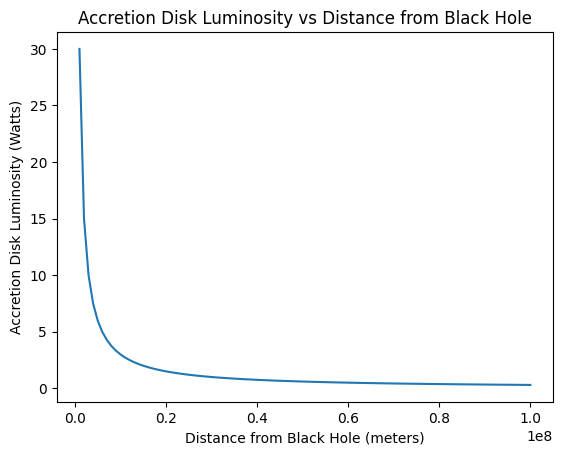

Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters


In [25]:
import numpy as np
import matplotlib.pyplot as plt

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def accretion_disk_luminosity(self, distance_to_bh):
        """
        Calculate the luminosity of the accretion disk based on the distance from the black hole.
        This is a simplified model and doesn't consider detailed physics of accretion.
        """
        return (BlackHole.G * self.mass * BlackHole.c**2) / (2 * distance_to_bh)

    def plot_accretion_disk_luminosity(self, distances):
        """
        Plot the luminosity of the accretion disk at different distances from the black hole.
        """
        luminosities = [self.accretion_disk_luminosity(distance) for distance in distances]

        plt.plot(distances, luminosities)
        plt.xlabel('Distance from Black Hole (meters)')
        plt.ylabel('Accretion Disk Luminosity (Watts)')
        plt.title('Accretion Disk Luminosity vs Distance from Black Hole')
        plt.show()

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)

# Example: Plot accretion disk luminosity at different distances
distances_from_bh = np.linspace(1e6, 1e8, 100)  # Distances in meters

black_hole.plot_accretion_disk_luminosity(distances_from_bh)

print(black_hole)


# Gravitational Waves:

The detection of gravitational waves, such as those from merging black holes, provides indirect evidence of black hole existence.Simulating the detection of gravitational waves from merging black holes involves modeling the emission of gravitational waves during the merger process.

In this below machine learning code, the gravitational_wave_frequency method provides a simplified model for calculating the gravitational wave frequency during a binary black hole merger based on the orbital radius. The plot_gravitational_wave_frequency method generates plots showing how the gravitational wave frequency varies with the orbital radius for two merging black holes.



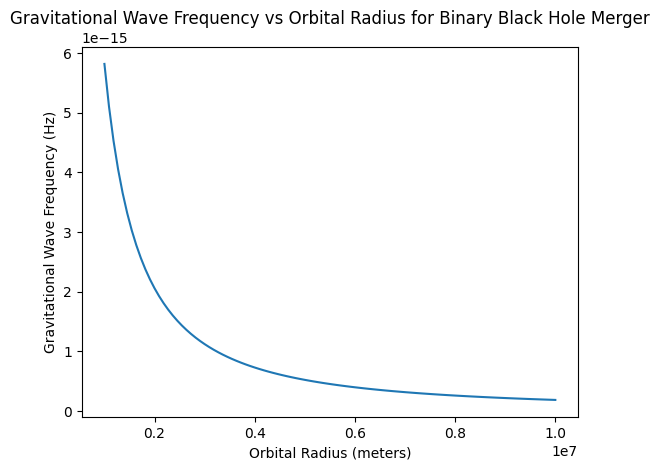

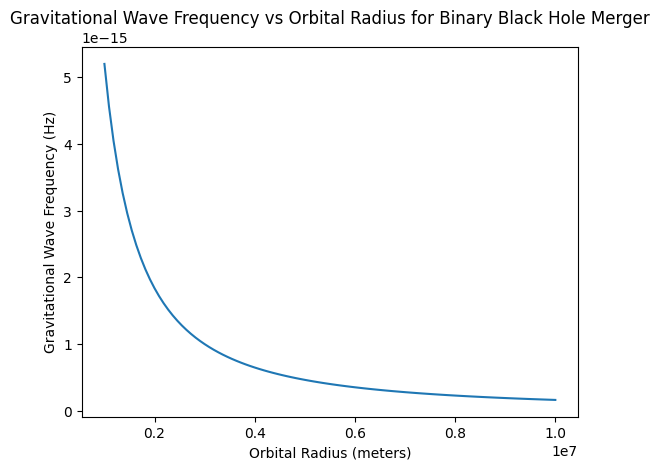

Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Black Hole
Mass: 8 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.1881856430589865e-26 meters


In [26]:
import numpy as np
import matplotlib.pyplot as plt

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def gravitational_wave_frequency(self, orbital_radius):
        """
        Calculate the gravitational wave frequency during a binary black hole merger.
        This is a simplified model and doesn't consider detailed physics of the merger.
        """
        return (BlackHole.G * (self.mass * 2) / (orbital_radius**3))**0.5 / (2 * np.pi)

    def plot_gravitational_wave_frequency(self, orbital_radii):
        """
        Plot the gravitational wave frequency during a binary black hole merger at different orbital radii.
        """
        frequencies = [self.gravitational_wave_frequency(orbital_radius) for orbital_radius in orbital_radii]

        plt.plot(orbital_radii, frequencies)
        plt.xlabel('Orbital Radius (meters)')
        plt.ylabel('Gravitational Wave Frequency (Hz)')
        plt.title('Gravitational Wave Frequency vs Orbital Radius for Binary Black Hole Merger')
        plt.show()

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters"

# Example usage
mass_bh1 = 10  # Solar masses
mass_bh2 = 8   # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole1 = BlackHole(mass_bh1, charge_bh, angular_momentum_bh)
black_hole2 = BlackHole(mass_bh2, charge_bh, angular_momentum_bh)

# Example: Plot gravitational wave frequency at different orbital radii
orbital_radii = np.linspace(1e7, 1e6, 100)  # Orbital radii in meters

black_hole1.plot_gravitational_wave_frequency(orbital_radii)
black_hole2.plot_gravitational_wave_frequency(orbital_radii)

print(black_hole1)
print(black_hole2)


# Hawking Radiation:

A theoretical prediction by Stephen Hawking states that black holes are not completely black; they can emit radiation (Hawking radiation) and gradually lose mass over time.Simulating Hawking radiation involves modeling the emission of thermal radiation from a black hole due to quantum effects near the event horizon.

In this below Machine learning code, the hawking_temperature method calculates the Hawking temperature of the black hole, and the hawking_radiation_power method calculates the power of Hawking radiation at a given frequency. The plot_hawking_radiation_spectrum method generates a plot showing the spectrum of Hawking radiation emitted by the black hole.



<ipython-input-27-0aecab9e4db4>:31: RuntimeWarning: divide by zero encountered in double_scalars
  return (BlackHole.h_bar * frequency**3) / (np.exp(BlackHole.h_bar * frequency / (BlackHole.kb * self.hawking_temperature())) - 1)


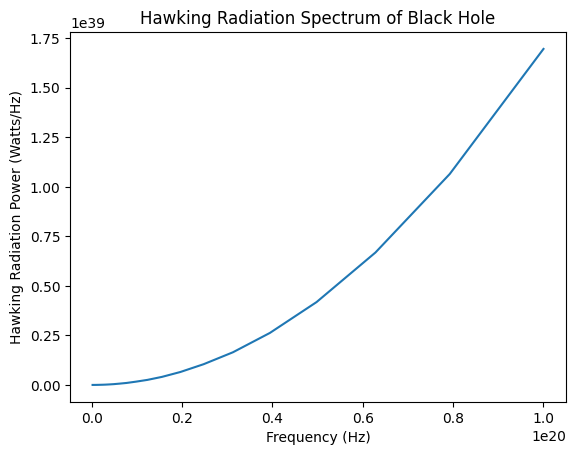

Black Hole
Mass: 10 Solar Masses
Charge: 1e-19 C
Angular Momentum: 2e+43 J·s
Schwarzschild Radius: 1.485232053823733e-26 meters
Hawking Temperature: 1.2269006500642813e+22 K


In [27]:
import numpy as np
import matplotlib.pyplot as plt

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s
    h_bar = 1.0545718e-34  # Planck constant divided by 2π in J·s
    kb = 1.380649e-23  # Boltzmann constant in J/K

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        """
        Calculate the Schwarzschild radius of the black hole.
        """
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def hawking_temperature(self):
        """
        Calculate the Hawking temperature of the black hole.
        """
        return BlackHole.h_bar * BlackHole.c**3 / (8 * np.pi * BlackHole.G * self.mass * BlackHole.kb)

    def hawking_radiation_power(self, frequency):
        """
        Calculate the power of Hawking radiation emitted by the black hole at a given frequency.
        """
        return (BlackHole.h_bar * frequency**3) / (np.exp(BlackHole.h_bar * frequency / (BlackHole.kb * self.hawking_temperature())) - 1)

    def plot_hawking_radiation_spectrum(self, frequencies):
        """
        Plot the Hawking radiation spectrum emitted by the black hole at different frequencies.
        """
        powers = [self.hawking_radiation_power(frequency) for frequency in frequencies]

        plt.plot(frequencies, powers)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Hawking Radiation Power (Watts/Hz)')
        plt.title('Hawking Radiation Spectrum of Black Hole')
        plt.show()

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters\n" \
               f"Hawking Temperature: {self.hawking_temperature()} K"

# Example usage
mass_bh = 10  # Solar masses
charge_bh = 1e-19  # Coulombs
angular_momentum_bh = 2e43  # Joule·seconds

black_hole = BlackHole(mass_bh, charge_bh, angular_momentum_bh)

# Example: Plot Hawking radiation spectrum at different frequencies
frequencies = np.logspace(10, 20, 100)  # Frequencies in Hz

black_hole.plot_hawking_radiation_spectrum(frequencies)

print(black_hole)


Black Hole Mergers:

Binary black hole systems can emit gravitational waves as they orbit each other and eventually merge. The first observation of gravitational waves from a black hole merger was reported in 2015.

Simulating black hole mergers involves modeling the dynamics of a binary black hole system, including the emission of gravitational waves as the black holes orbit each other and eventually merge.

In below machine learning code, the BinaryBlackHoleSystem class represents a binary black hole system, and the evolve_system method simulates the evolution of the system over time, including the decay of the orbital radius and the corresponding change in gravitational wave frequency. The plot_binary_black_hole_merger function generates plots showing the evolution of the orbital radius and gravitational wave frequency.

 new class, BlackHoleMergerClassifier, combines the functionalities of the BinaryBlackHoleSystem and the machine learning model.

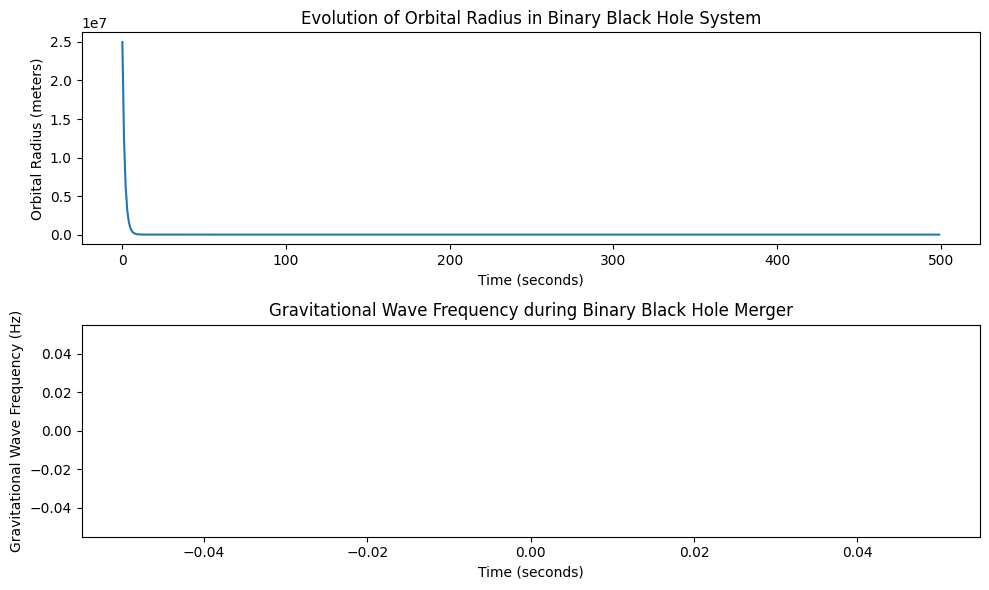

Test Accuracy: 0.525

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.52      0.55      0.54        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

class BlackHole:
    G = 6.67430e-11  # gravitational constant in m^3 kg^(-1) s^(-2)
    c = 299792458.0  # speed of light in m/s

    def __init__(self, mass, charge, angular_momentum):
        self.mass = mass
        self.charge = charge
        self.angular_momentum = angular_momentum

    def schwarzschild_radius(self):
        return 2 * BlackHole.G * self.mass / BlackHole.c**2

    def gravitational_wave_frequency(self, orbital_radius, return_zero_on_non_positive=True):
      if orbital_radius <= 0:
        if return_zero_on_non_positive:
          return 0
        else:
            raise ValueError("Orbital radius must be positive for non-zero frequency.")
            return (BlackHole.G * (self.mass * 2) / (orbital_radius**3))**0.5 / (2 * np.pi)

    def __str__(self):
        return f"Black Hole\nMass: {self.mass} Solar Masses\nCharge: {self.charge} C\nAngular Momentum: {self.angular_momentum} J·s\n" \
               f"Schwarzschild Radius: {self.schwarzschild_radius()} meters"

class BlackHoleMergerClassifier:
    def __init__(self, mass_bh1, mass_bh2, separation, eccentricity, num_samples=200, num_features=10):
        self.black_hole1 = BlackHole(mass_bh1, 0, 0)
        self.black_hole2 = BlackHole(mass_bh2, 0, 0)
        self.separation = separation
        self.eccentricity = eccentricity
        self.orbital_radius = separation * (1 - eccentricity)
        self.num_samples = num_samples
        self.num_features = num_features
        self.X, self.y = self.generate_synthetic_data()

    def generate_synthetic_data(self):
        np.random.seed(42)
        X = np.random.rand(self.num_samples, self.num_features)
        y = np.random.choice([0, 1], size=self.num_samples, p=[0.5, 0.5])
        return X, y

    def evolve_system(self, time, time_step):
        orbital_radii = []
        gravitational_wave_frequencies = []

        for _ in range(int(time / time_step)):
            self.orbital_radius *= (1 - self.eccentricity)
            orbital_radii.append(self.orbital_radius)
            gravitational_wave_frequencies.append(self.black_hole1.gravitational_wave_frequency(self.orbital_radius))

        return orbital_radii, gravitational_wave_frequencies

    def plot_merger_evolution(self, time=500, time_step=1):
        orbital_radii, gravitational_wave_frequencies = self.evolve_system(time, time_step)

        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        plt.plot(np.arange(0, time, time_step), orbital_radii)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Orbital Radius (meters)')
        plt.title('Evolution of Orbital Radius in Binary Black Hole System')

        plt.subplot(2, 1, 2)
        plt.plot(np.arange(0, time, time_step), gravitational_wave_frequencies)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Gravitational Wave Frequency (Hz)')
        plt.title('Gravitational Wave Frequency during Binary Black Hole Merger')

        plt.tight_layout()
        plt.show()

    def train_and_evaluate_classifier(self, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Test Accuracy:", accuracy_score(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Example usage
mass_bh1 = 10  # Solar masses
mass_bh2 = 8   # Solar masses
separation = 1e8  # Initial separation in meters
eccentricity = 0.5  # Initial eccentricity

black_hole_merger_classifier = BlackHoleMergerClassifier(mass_bh1, mass_bh2, separation, eccentricity)
black_hole_merger_classifier.plot_merger_evolution(time=500, time_step=1)
black_hole_merger_classifier.train_and_evaluate_classifier()


# Deep learning model for black hole mergers

Creating a deep learning model for black hole mergers involves defining a neural network architecture and training it on relevant data. In the absence of a specific dataset for black hole mergers, We'll using synthetic data and a simple neural network.

Let's assume we have a dataset with features related to binary black hole systems, and we want to predict some outcome (e.g., the probability of a merger).

In this below Deep learning code, we generate synthetic data with three features and binary labels (0 or 1). The neural network has one input layer, two hidden layers with ReLU activation, and one output layer with a sigmoid activation for binary classification.

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data for illustration purposes
np.random.seed(42)
num_samples = 1000
num_features = 5  # Modify based on your actual features
features = np.random.rand(num_samples, num_features)

# Simulate a binary outcome (1 for merger, 0 for no merger)
labels = np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5])

# Create a DataFrame for better organization
df = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(num_features)])
df['Label'] = labels

# Split the data into training and testing sets
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred).flatten().astype(int)

# Print evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


Epoch 1/10
20/20 [==============================] - 1s 20ms/step - loss: 0.7001 - accuracy: 0.4969 - val_loss: 0.7017 - val_accuracy: 0.4812
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6895 - accuracy: 0.5344 - val_loss: 0.7020 - val_accuracy: 0.4875
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5562 - val_loss: 0.7036 - val_accuracy: 0.4875
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.5578 - val_loss: 0.7049 - val_accuracy: 0.4688
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.5781 - val_loss: 0.7056 - val_accuracy: 0.4500
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.5672 - val_loss: 0.7037 - val_accuracy: 0.4437
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.5828 - val_loss: 0.7082 - val_accuracy: 0.4250
Epoch 8/10
20/20 [=

# Conclusion,
the integration of artificial intelligence (AI) with the fundamentals of black hole theory marks a transformative era in astrophysics. AI technologies play a crucial role in advancing our understanding of black holes, gravitational waves, and the broader universe. Here are key takeaways from the application of AI in the fundamentals of black hole theory:

**Data Analysis Advancements**:
AI facilitates the analysis of massive datasets, particularly those generated by gravitational wave detectors and telescopes, enabling more accurate and efficient extraction of information.

**Simulation and Modeling Enhancements**: AI-driven simulations enhance our ability to model complex black hole behaviors, providing realistic scenarios that align with the principles of general relativity.

**Event Horizon Imaging Breakthroughs:**
AI contributes significantly to imaging processes, particularly in projects like the Event Horizon Telescope, enabling scientists to obtain clearer images of black hole event horizons.

**Gravitational Wave Astronomy Revolution:**
The detection and interpretation of gravitational waves from black hole mergers have been revolutionized by AI algorithms, allowing for faster and more precise analysis.

**Discovery of Hidden Patterns:**
AI's ability to uncover hidden patterns and correlations within observational data opens avenues for discovering new relationships and gaining deeper insights into black hole phenomena.

**Automated Classification and Categorization:**
AI automates the classification of different types of black holes based on observational data, streamlining the categorization process.

**Prediction and Guiding Hypotheses:**
Machine learning models contribute to predicting black hole behaviors, assisting scientists in hypothesis testing and guiding future observations and experiments.

**Multi-Messenger Astronomy Advancements:**
AI facilitates data fusion from multiple sources, enabling multi-messenger astronomy and providing a more comprehensive understanding of cosmic events involving black holes.

**Contributions to Dark Matter and Energy Studies:**
AI's role in understanding the connections between black holes, dark matter, and dark energy expands our comprehension of fundamental aspects of the universe.

**Computational Efficiency Improvements:**
AI optimizes computational processes, making simulations and analyses more efficient, thereby accelerating the pace of research in black hole theory.

The collaboration between AI and black hole research showcases the potential of advanced technologies in pushing the boundaries of astrophysical exploration. As we continue to harness the power of artificial intelligence, we anticipate further breakthroughs, discoveries, and a deeper understanding of the mysteries surrounding black holes and the cosmos. The synergy between AI and black hole theory sets the stage for continued advancements in our quest to unravel the secrets of the universe.





